# House Price Prediction

# Table of Contents
* 1.Background
* 2.Prepare the data
    * [2.1.Load data](#loaddata)
    * [2.2.Understand dataset](#understanddata)
* 3.Processing Data
    * 3.1. Clean Data
        <br>[Bar plot: Percentage of training missing value](#trainmissing)
        <br>[Bar plot: Percentage of testing missing value](#testmissing)
    * 3.2. Understand value of data
        <br>[Distribution plot and Probability plot: Sale price](#sale)
        <br>[Distribution plot and Probability plot: Ground Living Area](#gla)
        <br>[Distribution plot and Probability plot: Garage Area](#gaf)
* 4.Feature Engineering
    * [4.1 Pre-build Plot Function](#prebuilt)
    * [4.2.Feature Selection](#selection)
        <br>[Pearson correlation cofficient](#pearsonheatmap)
        <br>[Random Forest](#forest)
    * [4.3.Understand features](#relation)
        * Numerical Features vs Sale Price
        <br>[Pairplot: important features with sale price](#pairplot)
        <br>[Scatter plt: Ground Living Area vs Sale Price](#scattergla)
        <br>[Scatter plt: Ground living Area vs Sale price group by overall quality](#scattergla+)
        <br>[3D Scatter plt: Ground living Area vs Sale price group by overall quality](#scatter3Dgla)
        <br>[Scatter plt: Area features VS Sale Price](#area)
        <br>[Scatter plt: All Area VS Sale Price](#scatterallarea)
        * Categorical Features vs Sale Price
        <br>[Box plt: Over all quality VS Sale Price](#overall)
        <br>[Box plt: Year Built VS Sale Price](#year)
        <br>[Scatter plt: Year Built VS Sale Price group by house style](#yearstyle)
        <br>[Scatter plt: Year Built VS Sale Price group by Neighbourhood](#yearneigh)
        <br>[Box plt: MS Zooming vs Sale Price](#ms)
        <br>[Box plt: MS SubClass VS Sale Price](#msclass)
        <br>[Box plt: Neighbourhood vs Sale Price](#neighbourhood)
        * Feature vs Feature
        <br>[Box plt: Groud Living Area VS Total rooms above grade](#glatagbox)
        <br>[Box plt: Garage Car vs Garage Area](#garagecar)
        <br>[Scatter plt: Year Sold pattern](#yearsold)
        <br>[Scatter plt: Month Sold pattern](#monthsold)
* 5.Build Model
    * [5.1 Prepareing Dataset](#predata)
    * [5.2 Building Simple Model](#buildmodel)
        <br> [Summry](#sumsimple)
    * [5.3 Building Emsemble Model](#buildemsemble)
        <br> [Summry](#sumemsemble)

# 1. Background <a name=“background”></a>:
    Of course, every one wants to have their own dream house, but people need to consider  lots of conditions, like location of house, house quality, whethere any school near the neiborhood etc.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## scipy
from scipy import stats

##xgboost
import xgboost
from xgboost import plot_importance

## matplotlib
import seaborn as sns; sns.set() # data visulization
import matplotlib.pyplot as plt # data visulization
%matplotlib inline

from collections import OrderedDict

## plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

## sklearn Preprocessing
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

## sklearn modeling
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

# 2. Prepare the data <a name="perpare">
## 2.1 Load data from csv <a name = "loaddata">

In [ ]:
## read train.csv file into a pd dataframe named as df_train
df_train = pd.read_csv('../input/train.csv')
print('done')

In [ ]:
## read test.csv file into a pd dataframe named as df_test
df_test = pd.read_csv('../input/test.csv')
print('done')

## 2.2 Understand Dataset<a name = "understanddata">

### 2.2.1 Take a look of all features

In [ ]:
## print out all of the colums in df_train
df_train.columns

In [ ]:
## print out all of the colums in df_test
df_test.columns

### 2.2.2 Take a look of dataset size

In [ ]:
## print out shape
print(df_train.drop_duplicates().shape)
print(df_test.drop_duplicates().shape)


### 2.2.3 Describe data

In [ ]:
## describe df_train
df_train.describe()

In [ ]:
## print first 5 rows of df_train
df_train.head(5)

In [ ]:
print(df_train.info)

In [ ]:
## describe df_test
df_test.describe()

In [ ]:
## print first 5 rows of df_test
df_test.head(5)

In [ ]:
print(df_test.info)

# 3. Data processing<a name='dataprocess'>

## 3.1 Data clean<a name='dataclean'>
### 3.1.1 Drop 'ID'

In [ ]:
df_train.drop('Id',axis=1,inplace=True)
df_test.drop('Id',axis=1,inplace=True)

### 3.1.2 Drop columns which percentage of missing value is greater than 15%

* Trainning Data

In [ ]:
## count how many missing value which features have
missing_total = df_train.isnull().sum().sort_values(ascending = False)

## calculate percentage of missing data of each feature
percent = (missing_total / df_train.isnull().count()).sort_values(ascending = False)

## combine total numbers and percent into a dataframe
percent_missing_data = pd.concat([missing_total,percent],axis=1,keys=['Total','Percent'],sort=False)

## assign a continus numbers to dataframe as Index to order to plot text value from each features in barplot
Index = range(0,80)
percent_missing_data['Index'] = Index

## print first 20 rows of data
percent_missing_data.head(20)

Barplot: Percentage of training missing value <a name = "trainmissing">

In [ ]:
## print barplot showing percentage of each feature

## initilize figure size
f,ax = plt.subplots(figsize = (10,7))

## rotate X ticks in case X ticks overhead
plt.xticks(rotation='90')

## choose first 20 rows assigning to barplot
sns.barplot(x=percent_missing_data.index[:20], y=percent_missing_data.iloc[:20,1]*100)

## assign X,Y label 
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)

## assign plot title
plt.title('Percent missing data of Training Data by feature', fontsize=20)

## assign percentage value to each feature
for index, row in percent_missing_data.iloc[:20].iterrows():
    plt.text(int(row.Index),(row.Percent * 100) + 0.1,(np.around(row.Percent * 100,decimals=2)).astype(str) + "%",ha = "center",color = "black" )

## show plot
plt.show()

In [ ]:
## drop feature which percentage of missing value > 15%
df_train_drop_useless = df_train.drop(percent_missing_data[percent_missing_data['Percent'] > 0.15].index,axis=1)

## check size of data after dropping
print(df_train_drop_useless.shape)

* Testing Data

In [ ]:
## count how many missing value which features have
missing_total_test = df_test.isnull().sum().sort_values(ascending = False)

## calculate percentage of missing data of each feature
percent_test = (missing_total_test / df_test.isnull().count()).sort_values(ascending = False)

## combine total numbers and percent into a dataframe
percent_missing_data_test = pd.concat([missing_total_test,percent_test],axis=1,keys=['Total','Percent'],sort=False)

## assign a continus numbers to dataframe as Index to order to plot text value from each features in barplot
Index = range(0,79)
percent_missing_data_test['Index'] = Index

## print first 20 rows of data
percent_missing_data_test.head(25)

Barplot: Percentage of testing missing value <a name = "testmissing">

In [ ]:
## print barplot showing percentage of each feature

## initilize figure size
f,ax = plt.subplots(figsize = (13,7))

## rotate X ticks in case X ticks overhead
plt.xticks(rotation='90')

## choose first 20 rows assigning to barplot
sns.barplot(x=percent_missing_data_test.index[:25], y=percent_missing_data_test.iloc[:25,1]*100)

## assign X,Y label 
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)

## assign plot title
plt.title('Percent missing data of Testing Data by feature', fontsize=20)

## assign percentage value to each feature
for index, row in percent_missing_data_test.iloc[:25].iterrows():
    plt.text(int(row.Index),(row.Percent * 100) + 0.1,(np.around(row.Percent * 100,decimals=2)).astype(str) + "%",ha = "center",color = "black" )

## show plot
plt.show()

In [ ]:
## drop feature which percentage of missing value > 15%
df_test_drop_useless = df_test.drop(percent_missing_data_test[percent_missing_data_test['Percent'] > 0.15].index,axis=1)

## check size of data after dropping
print(df_test_drop_useless.shape)

### 3.1.3 Fill missing value

* **Dealing with training Data**

In [ ]:
## figure out why GarageType is missing
df_train_missing_Garage = df_train[df_train['GarageCond'].isnull() == True]
df_train_missing_Garage

In [ ]:
df_train_missing_Garage[['GarageCond','GarageType','GarageQual','GarageFinish','GarageYrBlt']]

According to datafrme showing below, I find missing data comes when a house doesn't have any garage.  
* **GargeCond,GarageType,GarageQual and GarageFinish**: Replace missing data with None

In [ ]:
for col in ('GarageCond','GarageType','GarageQual','GarageFinish'):
    df_train_drop_useless[col] = df_train_drop_useless[col].fillna('None')

*** **GarageYrBlt**: Replace missing data with 0

In [ ]:
df_train_drop_useless['GarageYrBlt'] = df_train_drop_useless['GarageYrBlt'].fillna(0)

In [ ]:
## figure out why Basement value is missing
df_train_missing_Basement = df_train[df_train['BsmtCond'].isnull() == True]

In [ ]:
df_train_missing_Basement[['BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtExposure']]

According to the result showing below: I find the missing data comes when a house doesn't have a basement.
* **BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2**: Replace missing data with None

In [ ]:
for col in ('BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtExposure'):
    df_train_drop_useless[col] = df_train_drop_useless[col].fillna('None')

In [ ]:
## figure out why Masonry veneer value is missing
df_train_missing_Masonry = df_train[df_train['MasVnrType'].isnull() == True]

In [ ]:
df_train_missing_Masonry[['MasVnrType','MasVnrArea']]

According to the result showing below: I find the missing data comes when a house doesn't have any Masonry veneer.
* **MasVnrType**: Replace missing data with None

In [ ]:
df_train_drop_useless['MasVnrType'] = df_train_drop_useless['MasVnrType'].fillna('None')

* **MasVnrArea**: Replace missing data with 0

In [ ]:
df_train_drop_useless['MasVnrArea'] = df_train_drop_useless['MasVnrArea'].fillna(0)

In [ ]:
## figure out why Electrical value is missing
df_train[df_train['Electrical'].isnull() == True]

In [ ]:
## count value
df_train['Electrical'].value_counts()

* **Electrical**: Replace missing data with 'SBrkr', because this feature has mostly 'SBrkr'

In [ ]:
df_train_drop_useless['Electrical'] = df_train_drop_useless['Electrical'].fillna('SBrkr')

In [ ]:
## double check training dataset
df_train_drop_useless.isnull().sum().max()

* Dealing with testing data

In [ ]:
## figure out why GarageType is missing
df_test_missing_Garage = df_test[df_test['GarageCond'].isnull() == True]

In [ ]:
df_test_missing_Garage[['GarageCond','GarageType','GarageQual','GarageFinish','GarageYrBlt']]

According to datafrme showing below, I find missing data comes when a house doesn't have any garage.

* **GargeCond,GarageType,GarageQual and GarageFinish**: Replace missing data with None

In [ ]:
for col in ('GarageCond','GarageType','GarageQual','GarageFinish'):
    df_test_drop_useless[col] = df_test_drop_useless[col].fillna('None')

* **GarageYrBlt**: Replace missing data with 0

In [ ]:
df_test_drop_useless['GarageYrBlt'] = df_test_drop_useless['GarageYrBlt'].fillna(0)

In [ ]:
## figure out why Basement value is missing
df_test_missing_Basement = df_test[df_test['BsmtCond'].isnull() == True]

In [ ]:
df_test_missing_Basement[['BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtExposure']]

According to the result showing below: I find the missing data comes when a house doesn't have a basement.

* **BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2**: Replace missing data with None

In [ ]:
for col in ('BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtExposure'):
    df_test_drop_useless[col] = df_test_drop_useless[col].fillna('None')

* figure out why Masonry veneer value is missing

In [ ]:
df_test_missing_Masonry = df_test[df_test['MasVnrType'].isnull() == True]

In [ ]:
df_test_missing_Masonry[['MasVnrType','MasVnrArea']]

According to the result showing below: I find the missing data comes when a house doesn't have any Masonry veneer.

* **MasVnrType**: Replace missing data with None

In [ ]:
df_test_drop_useless['MasVnrType'] = df_test_drop_useless['MasVnrType'].fillna('None')

* **MasVnrArea**: Replace missing data with 0

In [ ]:
df_test_drop_useless['MasVnrArea'] = df_test_drop_useless['MasVnrArea'].fillna(0)

In [ ]:
## figure out why MS Zoning value is missing
df_test[df_test['MSZoning'].isnull() == True]

In [ ]:
## count value
df_test['MSZoning'].value_counts()

* **MS Zoning**: Replace missing data with 'RL', because this feature has mostly 'RL'

In [ ]:
df_test_drop_useless['MSZoning'] = df_test_drop_useless['MSZoning'].fillna('RL')

* Drop all of other missing data because there are only 1 or 2 in whole dataset considers as outlier.

In [ ]:
df_test_drop = df_test_drop_useless.dropna()

In [ ]:
## double check testing dataset
df_test_drop.isnull().sum().max()

### 3.1.4. Transform some numercial features into their real datatype

#MSSubClass=The building class
df_train_drop_useless['MSSubClass'] = df_train_drop_useless['MSSubClass'].apply(str)

#Changing OverallCond,OverallQual into a categorical variable
df_train_drop_useless['OverallCond'] = df_train_drop_useless['OverallCond'].astype(str)
df_train_drop_useless['OverallQual'] = df_train_drop_useless['OverallQual'].astype(str)

#Year and month sold are transformed into categorical features.
df_train_drop_useless['YrSold'] = df_train_drop_useless['YrSold'].astype(str)
df_train_drop_useless['MoSold'] = df_train_drop_useless['MoSold'].astype(str)
df_train_drop_useless['YearBuilt'] = df_train_drop_useless['YearBuilt'].astype(str)
df_train_drop_useless['YearRemodAdd'] = df_train_drop_useless['YearRemodAdd'].astype(str)
df_train_drop_useless['GarageYrBlt'] = df_train_drop_useless['GarageYrBlt'].astype(str)
df_train_drop_useless['GarageCars'] = df_train_drop_useless['GarageCars'].astype(str)

## 3.2 Beyond Analytics:Understanding value of the Data <a name = 'understandvalue'>

### 3.2.1. Understanding label(sale price)

In [ ]:
## overview SalePrice
df_train_drop_useless['SalePrice'].describe()

Distribution plot and Probability plot <a name = 'sale'>

In [ ]:
## plot distribution plot
sns.distplot(df_train_drop_useless['SalePrice'],kde_kws={"color":"black","label":"KDE"})

## plot probability plot
fig = plt.figure()
res = stats.probplot(df_train_drop_useless['SalePrice'],plot=plt)
plt.show()

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df_train_drop_useless['SalePrice'].skew())
print("Kurtosis: %f" % df_train_drop_useless['SalePrice'].kurt())

* Normalize Sale Price

In [ ]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df_train_drop_useless["SalePrice_log"] = np.log1p(df_train_drop_useless["SalePrice"])

#Check the new distribution 
sns.distplot(df_train_drop_useless['SalePrice_log']);

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train_drop_useless['SalePrice_log'], plot=plt)
plt.show()

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df_train_drop_useless['SalePrice'].skew())
print("Kurtosis: %f" % df_train_drop_useless['SalePrice'].kurt())

### 3.2.2.Understanding numerical features

* Ground Living Area<a name = 'gla'>

In [ ]:
## plot Ground living area with dist plot 
f,ax = plt.subplots(figsize=(5,5))
sns.distplot(df_train_drop_useless['GrLivArea'],kde_kws={"color":"black","label":"KDE"})

## also plot probability plot
fig = plt.figure()
res =  stats.probplot(df_train_drop_useless['GrLivArea'],plot = plt)
plt.show()

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df_train_drop_useless['GrLivArea'].skew())
print("Kurtosis: %f" % df_train_drop_useless['GrLivArea'].kurt())

In [ ]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df_train_drop_useless["GrLivArea"] = np.log1p(df_train_drop_useless["GrLivArea"])

#Check the new distribution 
sns.distplot(df_train_drop_useless['GrLivArea']);

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train_drop_useless['GrLivArea'], plot=plt)
plt.show()

* plot distribution dist plot of GarageArea feature<a name='gaf'>

In [ ]:
## plot GarageArea with dist plot 
f,ax = plt.subplots(figsize=(5,5))
sns.distplot(df_train_drop_useless['GarageArea'],kde_kws={"color":"black","label":"KDE"})

## also plot probability plot
fig = plt.figure()
res =  stats.probplot(df_train_drop_useless['GarageArea'],plot = plt)
plt.show()

print("skewness: {}".format(df_train_drop_useless['GarageArea'].skew()))
print("kurtosis: {}".format(df_train_drop_useless['GarageArea'].kurt()))


### 4. Feature engineering <a name = "engineering">
#### 4.1 Pre-built plot function<a name = 'prebuilt'>

* Box Plot from Plotly

In [ ]:
def plotly_box_x_y(df,val_x,val_y):
    trace = []
    for name,group in df[[val_x,val_y]].groupby(val_x):
        trace.append(go.Box(y = group[val_y].values, 
                        boxpoints = 'all',
                        name = name))
    layout = go.Layout(
    title = val_x + ' vs ' + val_y,
    xaxis = dict(
        title = val_x,
        ticklen = 5),
    yaxis = dict(
        title = val_y,
        ticklen = 5))
    fig = go.Figure(data=trace,layout=layout)
    iplot(fig)
    

* Scatter Plot from Plotly

In [ ]:
def plotly_scatter_x_y(df,val_x,val_y):
    fig = {'data': [{
        'x' : df[val_x],
        'y' : df[val_y],
        'mode' : 'markers'
    }],
          'layout' : {
              'title' : val_x + ' vs ' + val_y,
              'xaxis' : {'title' : val_x},
              'yaxis' : {'title' : val_y}
          }}
    iplot(fig)
    

* Scatter Plot group by from Plotly

In [ ]:
def plotly_scatter_x_y_catg_color(df, val_x, val_y, val_z):
    
    catg_for_colors = sorted(df[val_z].unique().tolist())

    fig = { 'data': [{ 'x': df[df[val_z]==catg][val_x],
                       'y': df[df[val_z]==catg][val_y],    
                       'name': catg, 
                       'text': df[val_z][df[val_z]==catg], 
                       'mode': 'markers',
                       'marker': {'size': 6},
                      
                     } for catg in catg_for_colors       ],
                       
            'layout': { 
                        'title' : val_x + ' vs ' + val_y + ' group by ' + val_z,
                        'xaxis': {'title': val_x},
                        'yaxis': {'title': val_y},                    
                        'colorway' : ['#a9a9a9', '#e6beff', '#911eb4', '#4363d8', '#42d4f4',
                                      '#3cb44b', '#bfef45', '#ffe119', '#f58231', '#e6194B'],
                        'autosize' : False, 
                        'width' : 750, 
                        'height' : 600,
                      }
           }
  
    iplot(fig)

* Scatter plot 3D from Plotly

In [ ]:
def plotly_scatter3d(df, val_x, val_y, val_z) :

    trace = go.Scatter3d( x = df[val_x], y = df[val_y], z = df[val_z],
                           mode='markers',
                           marker=dict( size=5, color=y,               
                                        colorscale='Viridis',  
                                        opacity=0.8 )
                          )
    data = [trace]
    camera = dict( up=dict(x=0, y=0, z=1),
                   center=dict(x=0, y=0, z=0.0),
                   eye=dict(x=2.5, y=0.1, z=0.8) )

    layout = go.Layout( title= val_z + " as function of " +  
                               val_x + " and " + val_y ,
                        autosize=False, width=700, height=600,               
                        margin=dict( l=15, r=25, b=15, t=30 ) ,
                        scene=dict(camera=camera,
                                   xaxis = dict(title=val_x),
                                   yaxis = dict(title=val_y),
                                   zaxis = dict(title=val_z),                                   
                                  ),
                       )

    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

#### 4.2 Feature selection <a name = "selection">

#### 4.2.1 Data filtering
* cut off by Pearson correlation coefficient

In [ ]:
## show relationship among all of the feature by using heatmap
#correlation matrix
corrmat = df_train_drop_useless.corr()

f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmat)

Barplot: Pearson correlation<a name = 'barpearson'>

In [ ]:
data = corrmat.sort_values(by=['SalePrice_log'],ascending=False)
x = data['SalePrice']
y = data.index
## bar plot showing more clear
f,ax = plt.subplots(figsize = (8,8))
sns.barplot(x,y)
sns.set_color_codes('pastel')
plt.xlabel('Correlation coefficient')
plt.title('Pearson correlation coefficient')

In [ ]:
## compare corrlation value between sale price and all others feartures, figure out how many fearture moderate relationship with sale price(out put)
select_pos = corrmat['SalePrice_log'] >= 0.4  
select_nag = corrmat['SalePrice_log'] <= -0.4
select_pos = select_pos[select_pos == True]
print(select_pos.count()-1)
select_nag = select_nag[select_nag == True]
print(select_nag.count()-1)

In [ ]:
index = corrmat.nlargest(14,'SalePrice_log')['SalePrice_log'].index
index_drop = index.drop(['SalePrice'])
index_drop

In [ ]:
## show relationship among top 11 features by using heatmap
corr_after = df_train_drop_useless[index_drop].corr()
corr_after


* Pearson Correlation Heatmap<a name='pearsonheatmap'>

In [ ]:
## plot heatmap
colormap = plt.cm.RdBu_r
f,ax = plt.subplots(figsize=(10,10))
plt.title('Pearson Correlation of each related feature',size = 15)
sns.heatmap(corr_after,linecolor='white',linewidths=0.1,cmap=colormap,annot=True,vmax=1.0,vmin=0)

#### 4.2.2 Data wrapping
* cut off by Random forest <a name ='forest'>

In [ ]:
x = df_train_drop_useless.iloc[:,0:-1]
y = df_train_drop_useless.iloc[:,-1]

## one-hot encoding categorical features
x_dummies = pd.get_dummies(x)

In [ ]:
rf = RandomForestRegressor()
rf.fit(x_dummies,y)
importance = rf.feature_importances_
indices = np.argsort(importance)[::-1]
features = x_dummies.columns
for f in range(0,30):
 print(("%2d) %-*s %f" % (f + 1, 30, features[f], importance[indices[f]])))

* cut off by xgboost regressor

model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

every_column_except_y= [col for col in df_train_drop_useless.columns if col not in ['SalePrice','Id']]
model.fit(pd.get_dummies(df_train_drop_useless[every_column_except_y]),df_train_drop_useless['SalePrice'])

OrderedDict(sorted(model.booster().get_fscore().items(), key=lambda t: t[1], reverse=True))

### 4.3 Understand relationship between features and house price<a name="relation">
#### 4.3.1 Take a quick look for big picture <a name ='pairplot'>

In [ ]:
# scatterplot
cols = ['SalePrice_log', 'OverallQual', 'GrLivArea', 'GarageCars','GarageArea','TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train_drop_useless[cols], height = 2.5)

#### 4.3.2 Understand relationship between some numerical features and house price

* Ground living Area vs Sale Price Log<a name= 'scattergla'>

In [ ]:
# show relationship between SalePrice and Living Area
plt.subplots(figsize=(10,10))
sns.scatterplot(x=df_train_drop_useless['GrLivArea'],y=df_train_drop_useless['SalePrice_log'])

In [ ]:
## drop outliers of data which sale price > 13.5 and living area > 4000
drop_index = df_train_drop_useless[(df_train_drop_useless['SalePrice_log'] > 13.5) | (df_train_drop_useless['GrLivArea'] > 8.3)].index
df_train_drop_outliers = df_train_drop_useless.drop(drop_index)
print(df_train_drop_outliers.shape)

In [ ]:
## show relationship between living area and Sale price after droping 
plt.subplots(figsize=(10,10))
sns.scatterplot(x=df_train_drop_outliers['GrLivArea'],y=df_train_drop_outliers['SalePrice_log'],data=df_train)

* Ground living Area vs Sale price group by overall quality<a name="scattergla+">

In [ ]:
plotly_scatter_x_y_catg_color(df_train_drop_outliers, 'GrLivArea', 'SalePrice', 'OverallQual')

* Ground living Area vs Sale price group by overall quality<a name="scatter3Dgla">

In [ ]:
plotly_scatter3d(df_train_drop_outliers,'GrLivArea', 'OverallQual', 'SalePrice')

* Area features VS Sale Price <a name='area'>

In [ ]:
y_col_vals = 'SalePrice_log'
area_features = ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                 'MasVnrArea', 'GarageArea', 'LotArea',
                 'WoodDeckSF', 'OpenPorchSF', 'BsmtFinSF1']
                # 'ScreenPorch'
x_col_vals = area_features

In [ ]:
nr_rows=3
nr_cols=3

fig = tools.make_subplots(rows=nr_rows, cols=nr_cols, print_grid=False,
                          subplot_titles=area_features )
                                                                
for row in range(1,nr_rows+1):
    for col in range(1,nr_cols+1): 
        
        i = (row-1) * nr_cols + col-1
     
        trace = go.Scatter(x = df_train_drop_useless[x_col_vals[i]], 
                           y = df_train_drop_useless[y_col_vals], 
                           name=x_col_vals[i], 
                           mode="markers", 
                           opacity=0.8)

        fig.append_trace(trace, row, col,)
 
                                                                                                  
fig['layout'].update(height=700, width=900, showlegend=False,
                     title='SalePrice vs. Area features')
iplot(fig)                                                

It shows that all of the Area features are positive related to sale price. In the Pearson correlation coefficient, it shows that Total Basement SF having very strong positive relation with first floor SF and we also obvered that Total Basement SF having strong positive relation with second floor SF. So I think it should have new feature sum all of area features.

In [ ]:
df_train_drop_outliers['allarea'] = (df_train_drop_outliers['TotalBsmtSF'] + df_train_drop_outliers['1stFlrSF'] + df_train_drop_outliers['2ndFlrSF'] + df_train_drop_outliers['MasVnrArea']
                                    + df_train_drop_outliers['GarageArea']  + df_train_drop_outliers['WoodDeckSF'] + df_train_drop_outliers['OpenPorchSF']
                                    + df_train_drop_outliers['BsmtFinSF1'].astype(int))

df_test_drop['allarea'] = (df_test_drop['TotalBsmtSF'] + df_test_drop['1stFlrSF'] + df_test_drop['2ndFlrSF'] + df_test_drop['MasVnrArea']+ df_test_drop['GarageArea']
                        + df_test_drop['WoodDeckSF'] + df_test_drop['OpenPorchSF']+ df_test_drop['BsmtFinSF1'].astype(int))

In [ ]:
print(df_train_drop_outliers['allarea'].corr(df_train_drop_outliers['SalePrice_log']))

* All Area vs Sale price <a name="scatterallarea">

In [ ]:
plotly_scatter_x_y(df_train_drop_outliers,'allarea','SalePrice')

#### 4.3.3 Understand relationship between some categorical features and house price

* Over all quality VS Sale Price log<a name='overall'>

In [ ]:
## show relationship between all quality and Sale price
f,ax = plt.subplots(figsize=(10,10))
sns.boxplot(x=df_train_drop_useless['OverallQual'],y=df_train_drop_useless['SalePrice_log'],data=df_train)

* Year Built VS Sale Price<a name='year'>

In [ ]:
## show relationship between year built of house and sale price
f,ax = plt.subplots(figsize=(20,10))
sns.boxplot(x=df_train_drop_useless['YearBuilt'],y=df_train_drop_useless['SalePrice'])
plt.xticks(rotation='90')

* Year Built VS Sale Price group by house style<a name='yearstyle'>

In [ ]:
plotly_scatter_x_y_catg_color(df_train_drop_outliers,'YearBuilt','SalePrice','HouseStyle')

* Year Built VS Sale Price group by Neighbourhood<a name='yearneigh'>

In [ ]:
plotly_scatter_x_y_catg_color(df_train_drop_outliers,'YearBuilt','SalePrice','Neighborhood')

* MS Zooming vs Sale Price<a name='ms'>

In [ ]:
## show relationship between MS Zooming and sale price
plotly_box_x_y(df_train_drop_outliers,'MSZoning','SalePrice')

* MS SubClass vs Sale Price<a name='msclass'>

In [ ]:
plotly_box_x_y(df_train_drop_outliers,'MSSubClass','SalePrice')

* Neighbourhood vs Sale Price<a name='neighbourhood'>

In [ ]:
## show relationship between MS Zooming and sale price
plotly_box_x_y(df_train_drop_outliers,'Neighborhood','SalePrice')

* All Area vs Sale Price group by Neighborhood

In [ ]:
plotly_scatter_x_y_catg_color(df_train_drop_outliers,'allarea','SalePrice','Neighborhood')

#### 4.3.4 Understand relationship between features

* Garage Car vs Garage Area<a name='garagecar'>

In [ ]:
plotly_box_x_y(df_train_drop_useless,'GarageCars','GarageArea')

* Total Rooms Grade vs Ground Living Area<a name='glatagbox'>

In [ ]:
plotly_box_x_y(df_train_drop_outliers,'TotRmsAbvGrd','GrLivArea')

* Pattern inside Year sold <a name='yearsold'>

In [ ]:
Year_sold = df_train_drop_outliers['YrSold'].value_counts().reset_index()
Year_sold.sort_values('index',inplace = True)

In [ ]:
f,ax = plt.subplots(figsize=(5,5))
sns.lineplot(x = 'index',y = 'YrSold',data = Year_sold)
sns.scatterplot(x = 'index',y = 'YrSold',data = Year_sold)
plt.ylabel('Amount of sold')
plt.xlabel('Year')
plt.title('Relation in Years')
plt.show()

* Pattern inside Month sold <a name='monthsold'>

In [ ]:
Month_sold = df_train_drop_outliers['MoSold'].value_counts().reset_index()
Month_sold.sort_values('index',inplace = True)

In [ ]:
f,ax = plt.subplots(figsize=(10,5))
sns.lineplot(x = 'index',y = 'MoSold',data = Month_sold)
sns.scatterplot(x = 'index',y = 'MoSold',data = Month_sold)
plt.ylabel('Amount of sold')
plt.xlabel('Month')
plt.title('Relation in Months')
plt.xticks(range(1,13))
plt.show()

# 5. Build Model<a name=''>

## 5.1 Prepareing Dataset<a name='predata'>

In [ ]:
corr_final = df_train_drop_outliers.corr()
features_boolean = corr_final['SalePrice_log'] > 0.4
features = features_boolean[features_boolean == True].index
features = features.drop(['TotalBsmtSF','1stFlrSF','SalePrice','GarageArea','MasVnrArea','TotRmsAbvGrd','SalePrice_log'])

In [ ]:
features

In [ ]:
list_dummies = ['OverallQual','YearBuilt','FullBath','Fireplaces','GarageCars']

In [ ]:
y,y_log = df_train_drop_outliers['SalePrice'],df_train_drop_outliers['SalePrice_log']

In [ ]:
all_data = pd.concat((df_train_drop_outliers[features],df_test_drop[features]))
all_data_dummies = pd.get_dummies(all_data,columns=list_dummies,drop_first=True)
df_train = all_data_dummies[:df_train_drop_outliers.shape[0]]
df_test = all_data_dummies[df_train_drop_outliers.shape[0]:]

In [ ]:
sc = StandardScaler()
x_train_dummies_fit = sc.fit_transform(df_train)
df_x_train = pd.DataFrame(x_train_dummies_fit)
df_x_train.head()

In [ ]:
x_test_dummies_fit = sc.transform(df_test)
df_x_test = pd.DataFrame(x_test_dummies_fit)
df_x_test.head()

In [ ]:
df_x_train.info()
df_x_test.info()

## 5.2 Building simple model<a name='buildmodel'>

* Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

Build model using Y (Sale Price)

In [ ]:
linear = LinearRegression().fit(df_x_train,y)
linear_r_sq = linear.score(df_x_train,y)
print('coefficient of determination:', linear_r_sq)

Build model using Y_log (Sale Price Log)

In [ ]:
linear_log = LinearRegression().fit(df_x_train,y_log)
linear_r_sq_log = linear_log.score(df_x_train,y_log)
print('coefficient of determination:', linear_r_sq_log)

* Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

Build model using Y (Sale Price)

In [ ]:
lasso = Lasso(tol=0.1).fit(df_x_train,y)
lasso_r_sq = lasso.score(df_x_train,y)
print('coefficient of determination:', lasso_r_sq)

Build model using Y_log (Sale Price)

In [ ]:
lasso_log = Lasso(alpha=0.000005,tol = 0.1).fit(df_x_train,y_log)
lasso_r_sq_log = lasso_log.score(df_x_train,y_log)
print('coefficient of determination:', lasso_r_sq_log)

Here, the key fact about LASSO regression is that it minimizes sum of squared error, under the constraint that the sum of absolute values of coefficients is less than some constant c. So, for all of the coefficients to be zero, there must be no vector of coefficients with summed absolute value less than c that improves error.

For another view, consider the LASSO loss function:

\begin{equation*}
\sum_{i = 1}^n (Y_i - X_i^T\beta) + \lambda\sum_{j=1}^p|\beta_j|
\end{equation*}

As put in the tutorial referenced above, "If λ is sufficiently large, some of the coefficients are driven to zero, leading to a sparse model." For it to be the case that zero coefficients minimize this function, λ must be large enough that any improvement in error (the left term) is less than the added loss from the increased norm (the right term).

It's common to use cross validation to set this parameter such that the model minimizes CV error. This could be why LassoCV gave you different results—it may have set λ for you.

* Ridge regression

In [ ]:
from sklearn.linear_model import Ridge

Build model using Y (Sale Price)

In [ ]:
ridge = Ridge().fit(df_x_train,y)
ridge_r_sq = ridge.score(df_x_train,y)
print('coefficient: ',ridge_r_sq)

In [ ]:
ridge_log = Ridge().fit(df_x_train,y_log)
ridge_log_r_sq = ridge_log.score(df_x_train,y_log)
print('coefficient: ',ridge_log_r_sq)

* Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet

Build model using Y (Sale Price)

In [ ]:
elastic = ElasticNet().fit(df_x_train,y)
elastic_r_sq = elastic.score(df_x_train,y)
print('coefficient: ',elastic_r_sq)

Build model using Y_log (Sale Price log)

In [ ]:
elastic_log = ElasticNet(alpha=0.0005).fit(df_x_train,y_log)
elastic_log_r_sq = elastic_log.score(df_x_train,y_log)
print('coefficient: ',elastic_log_r_sq)

### Summry <a name='sumsimple'>

In [202]:
score = [linear_r_sq,linear_r_sq_log,lasso_r_sq,lasso_r_sq_log,ridge_r_sq,ridge_log_r_sq,elastic_r_sq,elastic_log_r_sq]
regressors = ['Linear','Linear','Lasso','Lasso','Ridge','Ridge','Elastic Net','Elastic Net']
sale_type = ['sale_price','sale_price_log','sale_price','sale_price_log','sale_price','sale_price_log','sale_price','sale_price_log']
data = {
    'score':score,
    'regressors':regressors,
    'sale_price_type':sale_type
}

In [203]:
df_score = pd.DataFrame(data = data)
df_score.head()

,score,regressors,sale_price_type
0,0.897031,Linear,sale_price
1,0.896644,Linear,sale_price_log
2,0.890964,Lasso,sale_price
3,0.889181,Lasso,sale_price_log
4,0.896885,Ridge,sale_price


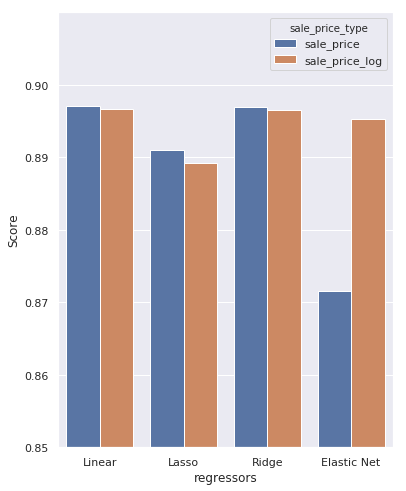

In [204]:
f,ax = plt.subplots(figsize=(6,8))
sns.barplot(x = 'regressors',y = 'score',hue = 'sale_price_type',data = df_score,ax = ax)
plt.ylabel('Score')
plt.yticks(np.arange(0.85,0.9,0.01))
plt.ylim((0.85,0.91))
plt.show()

## 5.3 Building emsemble model<a name='buildemsemble'>

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

* Linear Adaboost

Build model using Y (Sale Price)

In [ ]:
linearada = AdaBoostRegressor(LinearRegression())
linearada.fit(df_x_train,y)
linearada_score = linearada.score(df_x_train,y)
print('coefficient: ',linearada_score)

Build model using Y_log (Sale Price Log)

In [ ]:
linearada_log = AdaBoostRegressor(LinearRegression())
linearada_log.fit(df_x_train,y_log)
linearada_score_log = linearada_log.score(df_x_train,y_log)
print('coefficient: ',linearada_score_log)

* Lasso Adaboost

Build model using Y (Sale Price)

In [ ]:
lassoada = AdaBoostRegressor(Lasso(tol=0.1))
lassoada.fit(df_x_train,y)
lassoada_score = lassoada.score(df_x_train,y)
print('coefficient: ',lassoada_score)

Build model using Y_log (Sale Price log)

In [ ]:
lassoada_log = AdaBoostRegressor(Lasso(alpha=0.000005,tol=0.2))
lassoada_log.fit(df_x_train,y_log)
lassoada_score_log = lassoada_log.score(df_x_train,y_log)
print('coefficient: ',lassoada_score_log)

* Ridge Adaboost

Build model using Y (Sale Price)

In [ ]:
Ridgeada = AdaBoostRegressor(Ridge())
Ridgeada.fit(df_x_train,y)
Ridgeada_score = Ridgeada.score(df_x_train,y)
print('coefficient: ',Ridgeada_score)

Build model using Y_log (Sale Price log)

In [ ]:
Ridgeada_log = AdaBoostRegressor(Ridge())
Ridgeada_log.fit(df_x_train,y_log)
Ridgeada_score_log = Ridgeada_log.score(df_x_train,y_log)
print('coefficient: ',Ridgeada_score_log)

* Elastic Net Adaboost

Build model using Y (Sale Price)

In [ ]:
Elasticada = AdaBoostRegressor(ElasticNet())
Elasticada.fit(df_x_train,y)
Elasticada_score = Elasticada.score(df_x_train,y)
print('coefficient: ',Elasticada_score)

Build model using Y_log (Sale Price log)

In [ ]:
Elasticada_log = AdaBoostRegressor(ElasticNet(alpha = 0.05))
Elasticada_log.fit(df_x_train,y_log)
Elasticada_score_log = Elasticada_log.score(df_x_train,y_log)
print('coefficient: ',Elasticada_score_log)

### Summry <a name='sumemsemble'>

In [205]:
score_em = [linearada_score,linearada_score_log,lassoada_score,lassoada_score_log,Ridgeada_score,Ridgeada_score_log,Elasticada_score,Elasticada_score_log]
regressors = ['Linear','Linear','Lasso','Lasso','Ridge','Ridge','Elastic Net','Elastic Net']
sale_type = ['sale_price','sale_price_log','sale_price','sale_price_log','sale_price','sale_price_log','sale_price','sale_price_log']
data_em = {
    'score':score_em,
    'regressors':regressors,
    'sale_price_type':sale_type
}

In [206]:
df_score_em = pd.DataFrame(data = data_em)
df_score.head()

,score,regressors,sale_price_type
0,0.897031,Linear,sale_price
1,0.896644,Linear,sale_price_log
2,0.890964,Lasso,sale_price
3,0.889181,Lasso,sale_price_log
4,0.896885,Ridge,sale_price


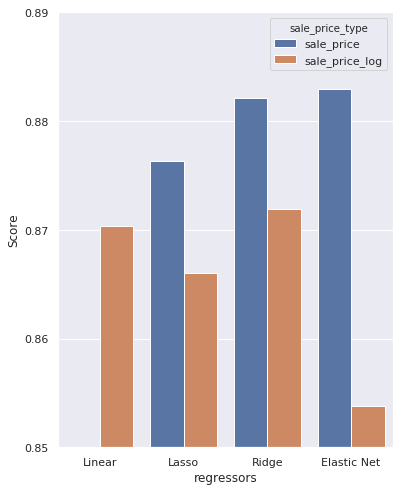

In [207]:
f,ax = plt.subplots(figsize=(6,8))
sns.barplot(x = 'regressors',y = 'score',hue = 'sale_price_type',data = df_score_em,ax = ax)
plt.ylabel('Score')
plt.yticks(np.arange(0.85,0.9,0.01))
plt.ylim((0.85,0.89))
plt.show()